In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Importing the data 

In [2]:
fraud_train=pd.read_csv("C:/Users/HP/Desktop/Data analysis/fraudTrain.csv")

In [3]:
print(fraud_train.shape)

(1296675, 23)


In [4]:
fraud_test=pd.read_csv("C:/Users/HP/Desktop/Data analysis/fraudTest.csv")

In [5]:
print(fraud_test.shape)

(555719, 23)


# 2. Data Pre_processing 

1. Concatinating the data 

In [6]:
data=pd.concat([fraud_train,fraud_test])

In [7]:
print(data.shape)

(1852394, 23)


In [8]:
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


2. Checking for missing values 

In [9]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

3. checking for duplicated values 

In [10]:
duplicates = data.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 1852394, dtype: bool


In [11]:
print(data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [12]:
data=fraud_test

4. dropping unnecessary variables 

In [13]:
data.drop(["Unnamed: 0", "gender", "first", "last", "street", "city", "state", "zip", "trans_num"], axis=1, inplace=True) 

In [14]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


# 3. Feature engineering 

In [15]:
print(type(data['trans_date_trans_time']))

<class 'pandas.core.series.Series'>


1. converting the date and time variiable into a datetime object 

In [16]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   lat                    555719 non-null  float64       
 6   long                   555719 non-null  float64       
 7   city_pop               555719 non-null  int64         
 8   job                    555719 non-null  object        
 9   dob                    555719 non-null  object        
 10  unix_time              555719 non-null  int64         
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

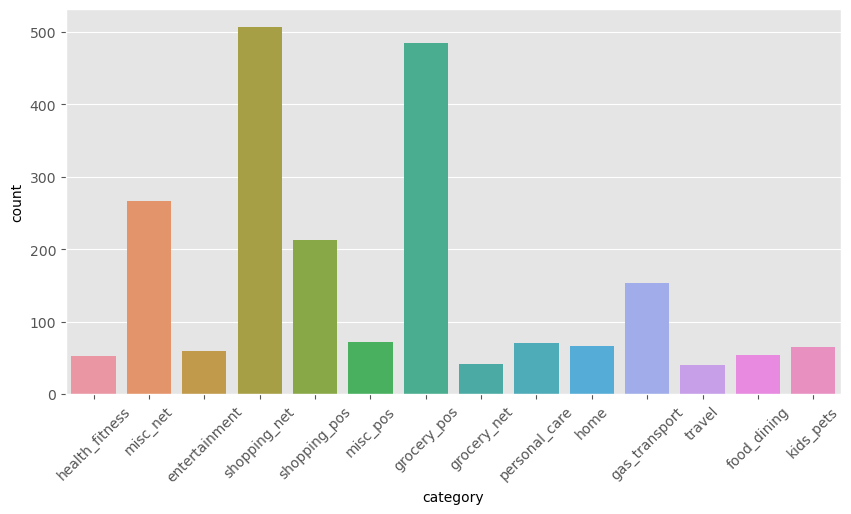

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=data[data['is_fraud']==1].category)
plt.xticks(rotation=45)
plt.show()

In [19]:
100*data.is_fraud.value_counts(normalize=True)

0    99.614014
1     0.385986
Name: is_fraud, dtype: float64

<Axes: xlabel='is_fraud', ylabel='count'>

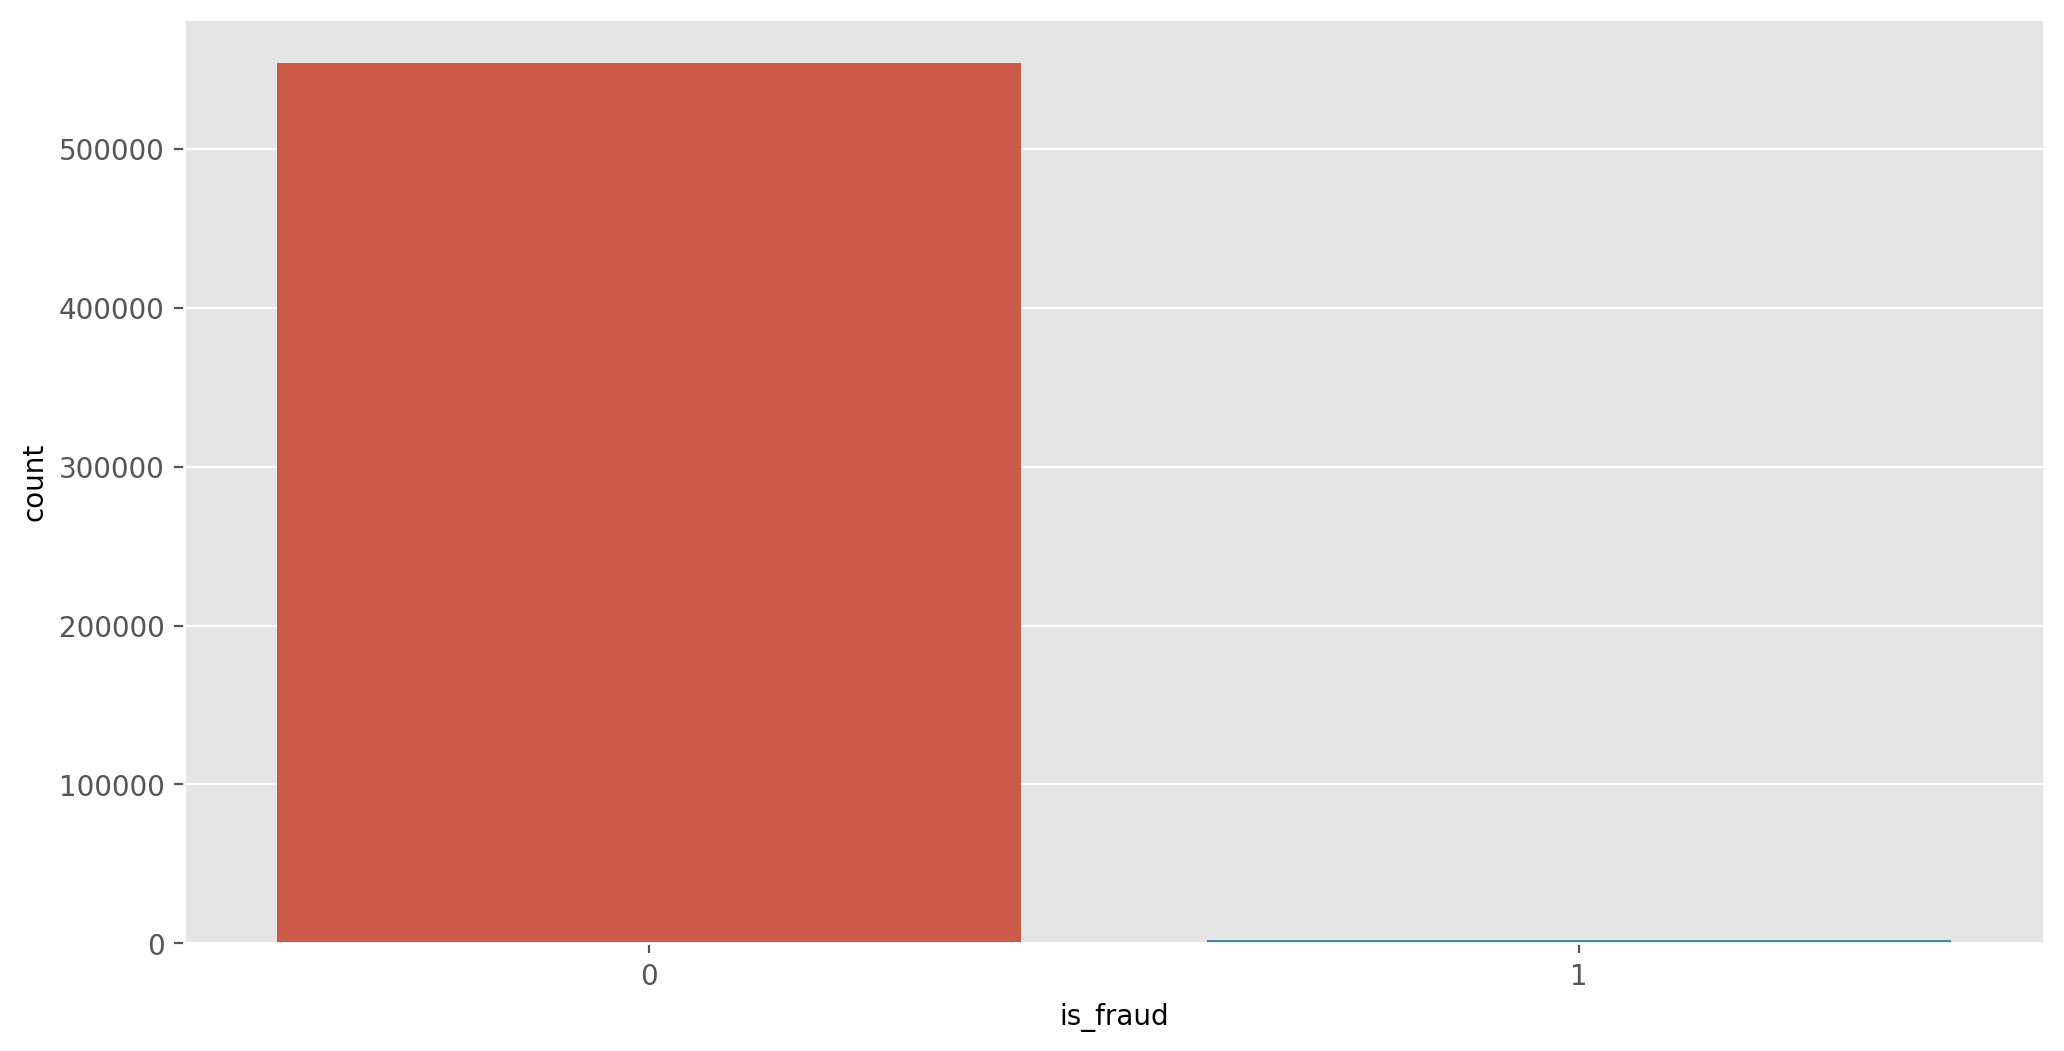

In [20]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = data['is_fraud'])

In [21]:
 pd.concat([data['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
     data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})], axis=1)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,555719.000000,553574.000000,2145.000000
1,mean,69.392810,67.614408,528.356494
2,std,156.745941,152.471931,392.747594
3,min,1.000000,1.000000,1.780000
4,50%,47.290000,47.150000,371.940000
5,95%,193.051000,188.870000,1084.108000
6,99.9%,1572.723500,1575.960200,1311.443760
7,max,22768.110000,22768.110000,1320.920000


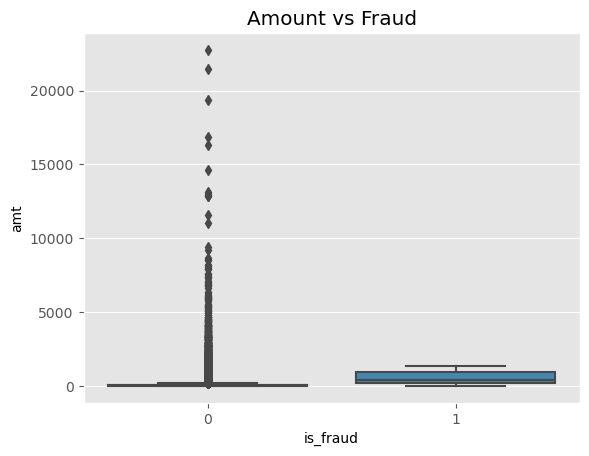

In [22]:
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title("Amount vs Fraud")
plt.show()

2. Encoding the data 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   lat                    555719 non-null  float64       
 6   long                   555719 non-null  float64       
 7   city_pop               555719 non-null  int64         
 8   job                    555719 non-null  object        
 9   dob                    555719 non-null  object        
 10  unix_time              555719 non-null  int64         
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoders = {}
for column in data.select_dtypes(include=['object']):
    encoders[column] = LabelEncoder()
    data[column] = encoders[column].fit_transform(data[column])


In [26]:
# descriptive statistics 

In [27]:
data.describe()

,cc_num,merchant,category,amt,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,343.086430,6.237059,69.392810,38.543253,-90.231325,8.822189e+04,241.755040,494.567154,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,201.284993,3.912874,156.745941,5.061336,13.721780,3.003909e+05,136.327924,256.767245,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,0.000000,0.000000,1.000000,20.027100,-165.672300,2.300000e+01,0.000000,0.000000,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,166.000000,3.000000,9.630000,34.668900,-96.798000,7.410000e+02,124.000000,283.000000,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,346.000000,6.000000,47.290000,39.371600,-87.476900,2.408000e+03,239.000000,517.000000,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,515.000000,10.000000,83.010000,41.894800,-80.175200,1.968500e+04,362.000000,710.000000,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,692.000000,13.000000,22768.110000,65.689900,-67.950300,2.906700e+06,477.000000,909.000000,1.388534e+09,66.679297,-66.952026,1.000000


In [28]:
# ploting a correlation heat map 

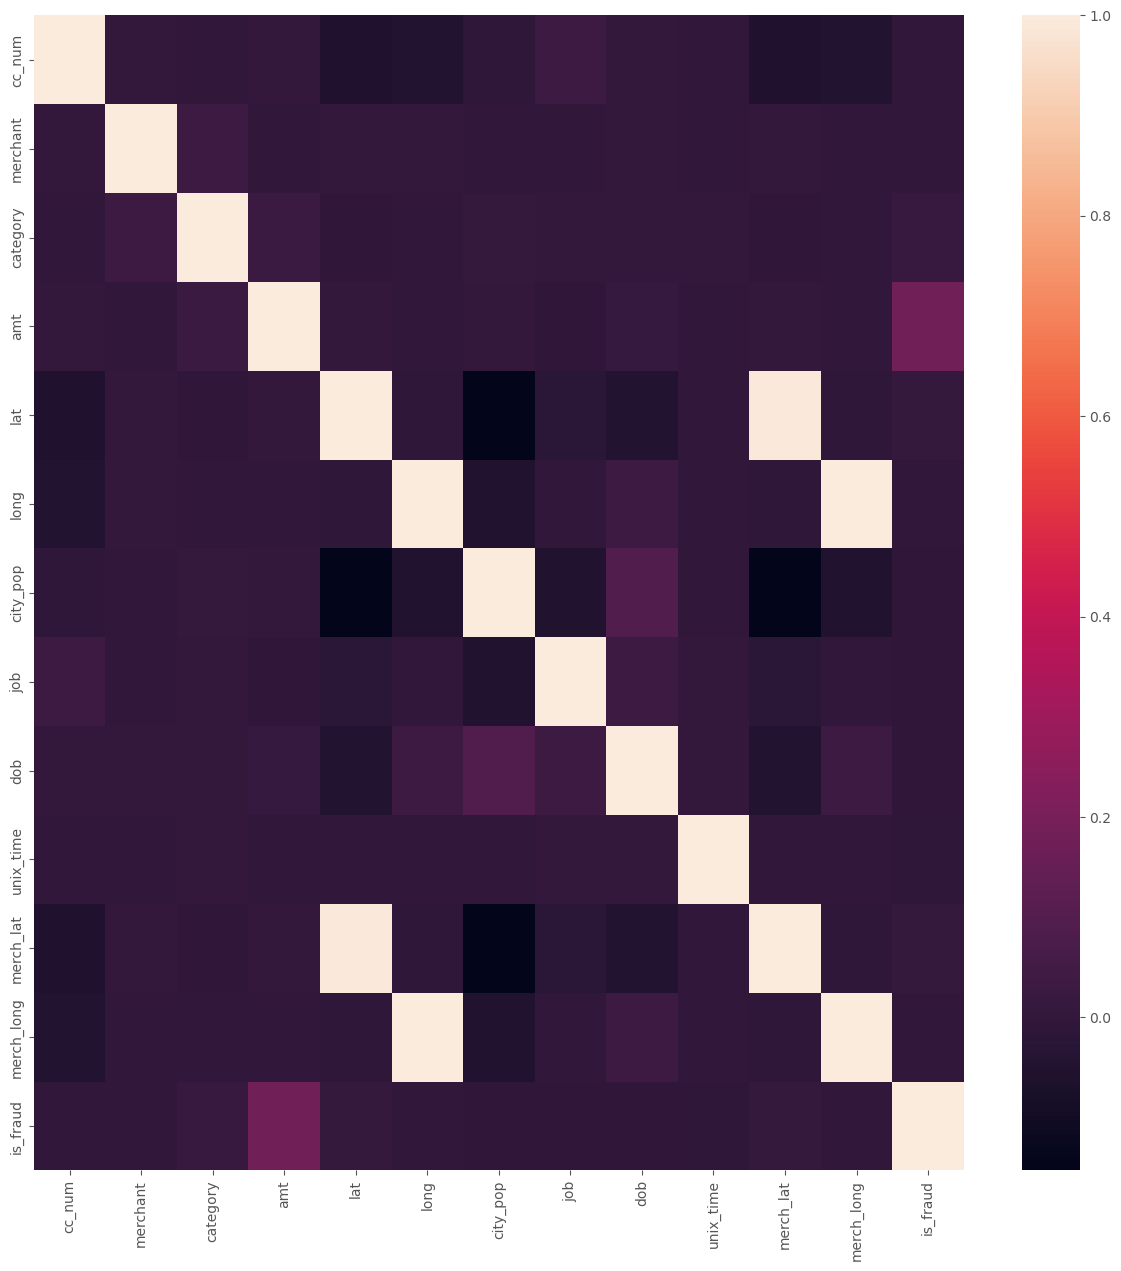

In [29]:
df_random_under_corr = fraud_test.corr()
#plotting the correlation heatplot
plt.figure(figsize=(15,15))
sns.heatmap(df_random_under_corr)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  int32         
 3   category               555719 non-null  int32         
 4   amt                    555719 non-null  float64       
 5   lat                    555719 non-null  float64       
 6   long                   555719 non-null  float64       
 7   city_pop               555719 non-null  int64         
 8   job                    555719 non-null  int32         
 9   dob                    555719 non-null  int32         
 10  unix_time              555719 non-null  int64         
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [32]:
y=data["is_fraud"]
X=data.drop(['is_fraud','trans_date_trans_time'],axis=1)

In [33]:
#scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train: (389003, 12)
X_test: (166716, 12)
y_train (389003,)
y_test (166716,)


In [36]:
# 4. Building the ML models 

1. Logistic Regression model 

In [37]:
from sklearn.linear_model import LogisticRegression 

In [38]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
log_pred=logistic_model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score

In [41]:
report = classification_report(y_test, log_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166056
           1       0.00      0.00      0.00       660

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716



In [42]:
accuracy = accuracy_score(y_test, log_pred)

In [43]:
print(accuracy)

0.9956572854435087


2. Support Vector Machines 

In [44]:
from sklearn.svm import SVC

In [45]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [46]:
svm_pred=svm_model.predict(X_test)

In [47]:
report = classification_report(y_test, svm_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166056
           1       0.67      0.22      0.33       660

    accuracy                           1.00    166716
   macro avg       0.83      0.61      0.66    166716
weighted avg       1.00      1.00      1.00    166716



In [48]:
accuracy = accuracy_score(y_test, svm_pred)
print(accuracy)

0.9964850404280333


3. Random Forest Classifier 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
rf_pred=rf_model.predict(X_test)

In [52]:
report = classification_report(y_test, svm_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166056
           1       0.67      0.22      0.33       660

    accuracy                           1.00    166716
   macro avg       0.83      0.61      0.66    166716
weighted avg       1.00      1.00      1.00    166716



In [53]:
accuracy = accuracy_score(y_test, rf_pred)
print(accuracy)

0.9980385805801483


4. The Naive Bayes classification model 

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [56]:
gnb_predict=gnb_model.predict(X_test)

In [57]:
report=classification_report(y_test,gnb_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    166056
           1       0.22      0.46      0.30       660

    accuracy                           0.99    166716
   macro avg       0.61      0.73      0.65    166716
weighted avg       0.99      0.99      0.99    166716



In [58]:
accuracy = accuracy_score(y_test, gnb_predict)
print(accuracy)

0.9915964874397178


5. Decision trees 

In [59]:
from sklearn.tree import DecisionTreeClassifier 

In [60]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
tree_pred=tree_model.predict(X_test)

In [62]:
report=classification_report(y_test,tree_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166056
           1       0.63      0.65      0.64       660

    accuracy                           1.00    166716
   macro avg       0.81      0.82      0.82    166716
weighted avg       1.00      1.00      1.00    166716



In [63]:
accuracy = accuracy_score(y_test, tree_pred)
print(accuracy)

0.9971088557786895


In [64]:
importances = tree_model.feature_importances_

In [65]:
print(data.columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [66]:
feature_names = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat']

In [67]:
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

trans_date_trans_time: 0.02879274474306613
cc_num: 0.03359521246540818
merchant: 0.3087243025006872
category: 0.29279869973129813
amt: 0.023990293560979772
lat: 0.023452558766386543
long: 0.0468504784001722
city_pop: 0.039584719344952765
job: 0.060381768089105635
dob: 0.056170087841709064
unix_time: 0.04702995237394661
merch_lat: 0.03862918218228769


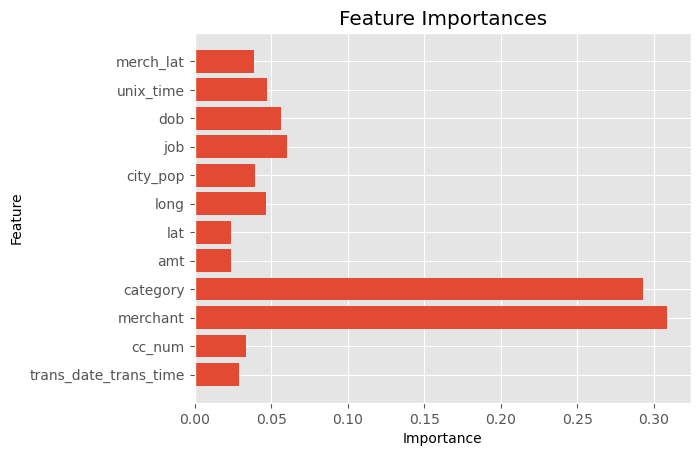

In [68]:
plt.barh(range(len(importances)), importances, tick_label=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 5. The issue of Model imbalance 

In [69]:
from imblearn.under_sampling import RandomUnderSampler

In [70]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

0    1485
1    1485
Name: is_fraud, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

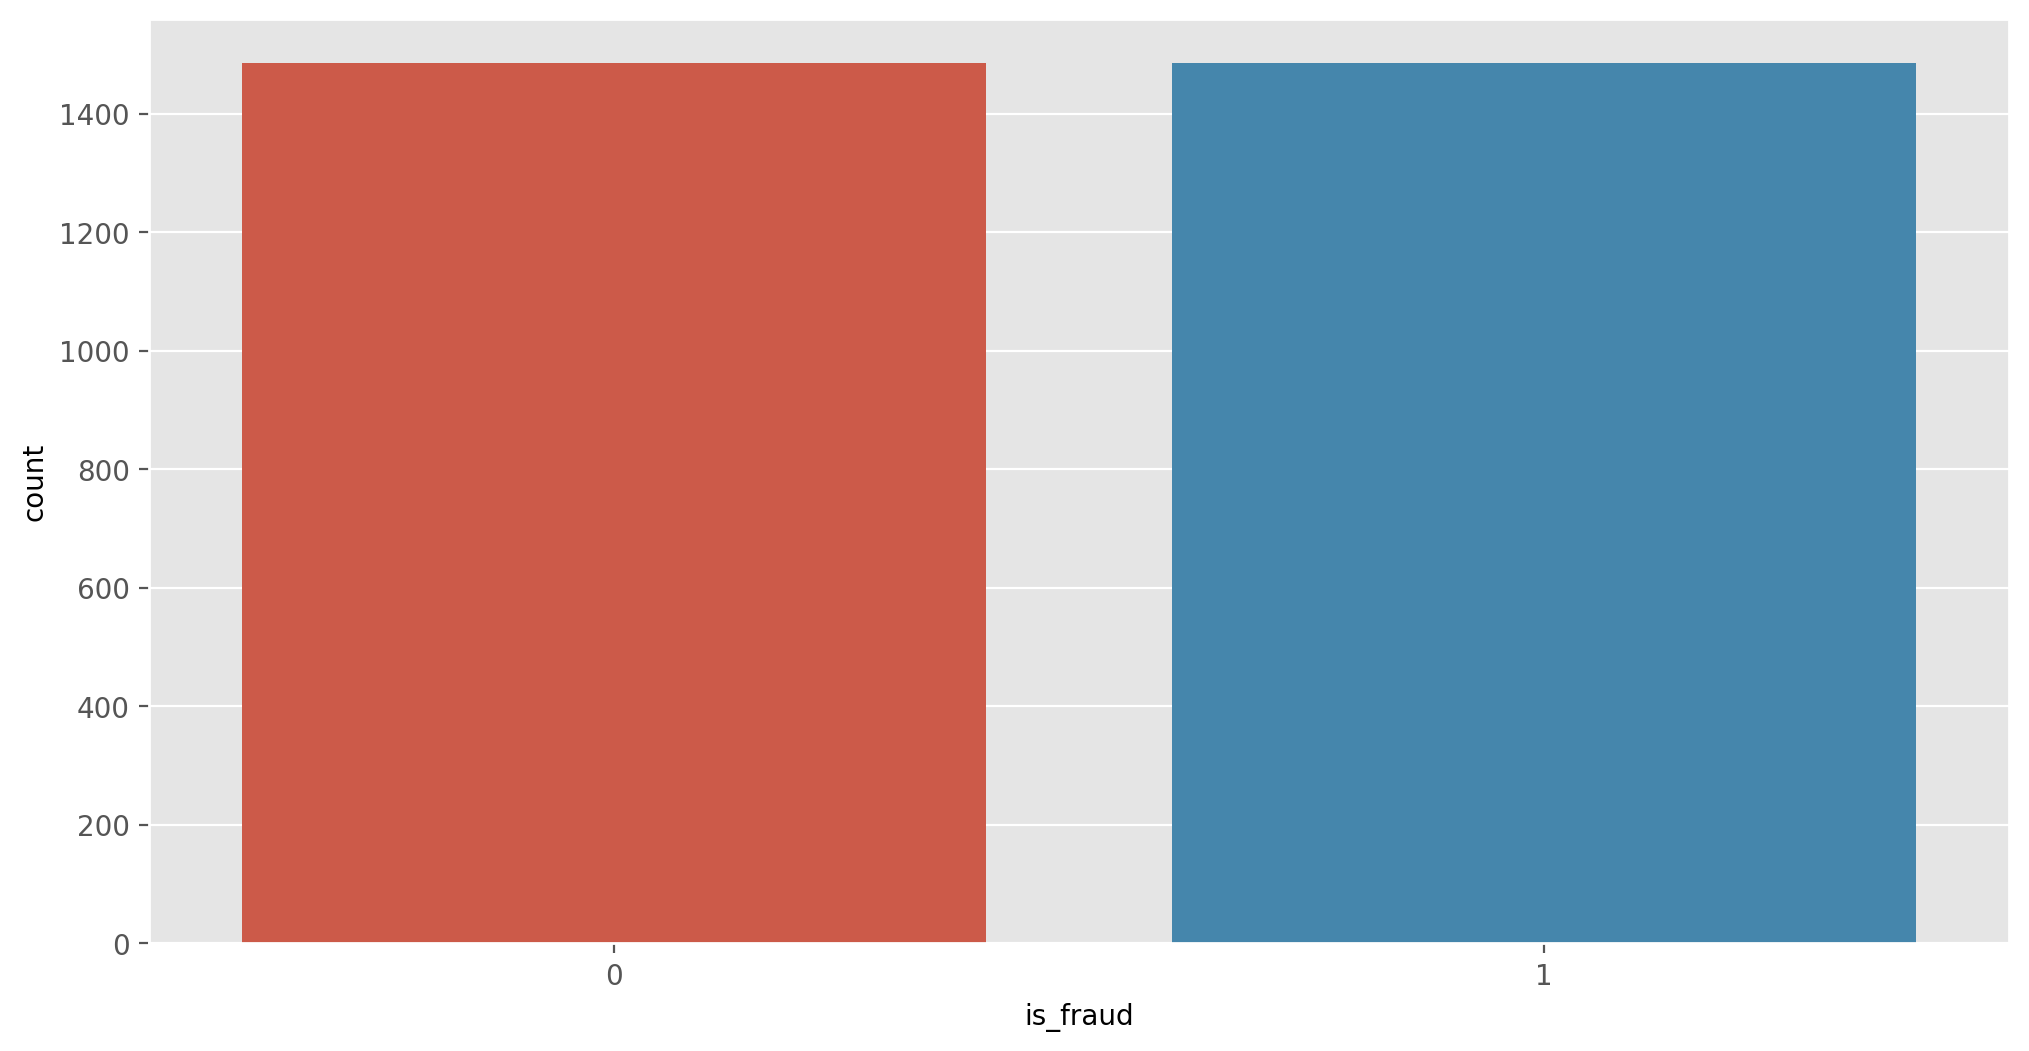

In [71]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = y_rus)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)

In [73]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
dtc_pred=dtc.predict(X_test)

In [75]:
report=classification_report(y_test,dtc_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       446
           1       0.93      0.94      0.94       445

    accuracy                           0.94       891
   macro avg       0.94      0.94      0.94       891
weighted avg       0.94      0.94      0.94       891



In [76]:
accuracy = accuracy_score(y_test, dtc_pred)
print(accuracy)

0.9371492704826038


1.Creating an ROC-AUC curve of the model 

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

In [79]:
y_score = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

In [80]:
auc = roc_auc_score(y_test, y_score)

In [81]:
# Plot the ROC curve

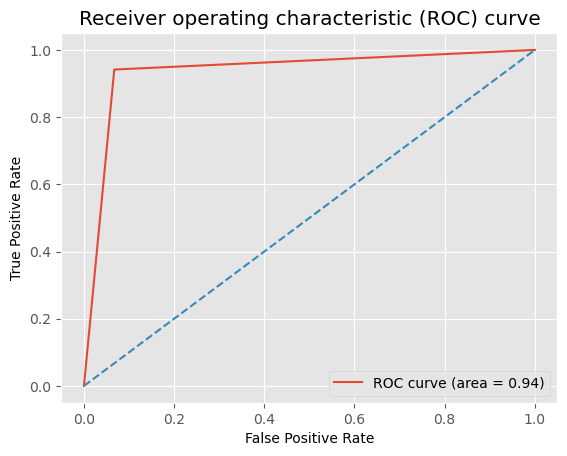

In [82]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

# 6 . Accuracy comparison of the created models 

In [96]:
models = ['LogisticRegression','Support Vector Machines','Random Forest','Naive Bayes','Decision trees']
accuracies = [99.5,99.6,99.8,99.1,99.7]

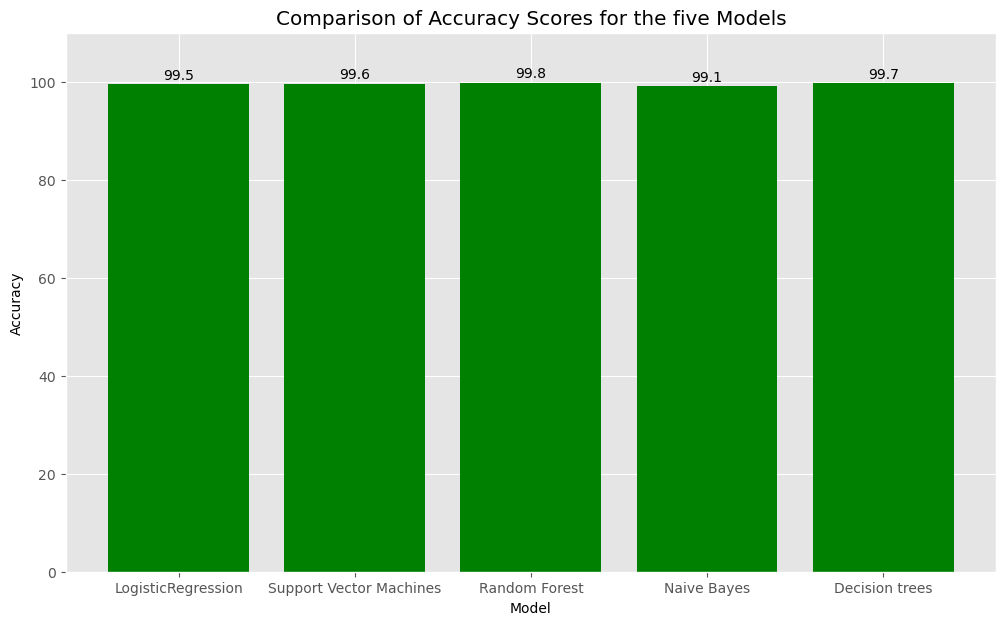

In [101]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(models, accuracies, color='g')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 110])
ax.set_title('Comparison of Accuracy Scores for the five Models')
for i, v in enumerate(accuracies):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)